In [ ]:
## Classification 2
### Naive Bayes Classifer



![Frequency table](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1543836883/image_4_lyi0ob.png)

In [1]:
# First Feature
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny', 'Rainy','Sunny','Overcast','Overcast','Rainy']
# Second Feature
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']
# Label or target variable
play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [2]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

weather_encoded = le.fit_transform(weather)
print(weather_encoded)

temp_encoded = le.fit_transform(temp)
label = le.fit_transform(play)

print(temp_encoded)
print(label)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]
[1 1 1 2 0 0 0 2 0 2 2 2 1 2]
[0 0 1 1 1 0 1 0 1 1 1 1 1 0]
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [3]:
features = list(zip(weather_encoded, temp_encoded))
print(features)

[(2, 1), (2, 1), (0, 1), (1, 2), (1, 0), (1, 0), (0, 0), (2, 2), (2, 0), (1, 2), (2, 2), (0, 2), (0, 1), (1, 2)]


In [4]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(features, label)

predicted = model.predict([[0, 2]]) # 0: Overcast, 2: Mild
print(predicted)

[1]


In [5]:
# Multiple Labels with Naive Bayes

from sklearn.datasets import load_wine
wine = load_wine()


In [6]:
print('Features:', wine.feature_names)
print('Label:', wine.target_names)

Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Label: ['class_0' 'class_1' 'class_2']


In [8]:
# Train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=109)

gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_prediction = gnb.predict(X_test)

print(metrics.accuracy_score(y_test, y_prediction))

0.9074074074074074


In [ ]:
# Decision Tree


![DT](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1545934190/1_r5ikdb.png)

In [77]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.model_selection import train_test_split
from sklearn import metrics



In [78]:
col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

pima = pd.read_csv('./diabetes.csv', header=None, names=col_names)

pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Pregnancies               769 non-null    object
 1   Glucose                   769 non-null    object
 2   BloodPressure             769 non-null    object
 3   SkinThickness             769 non-null    object
 4   Insulin                   769 non-null    object
 5   BMI                       769 non-null    object
 6   DiabetesPedigreeFunction  769 non-null    object
 7   Age                       769 non-null    object
 8   Outcome                   769 non-null    object
dtypes: object(9)
memory usage: 54.2+ KB


In [79]:
numer = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

for col in numer:
    pima[col] = pd.to_numeric(pima[col], errors='coerce')
pima.dropna(inplace=True)

X = pima[['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']]
Y = pima['Outcome']

In [17]:
print(X)
print(Y)

     Pregnancies  Insulin   BMI   Age  Glucose  BloodPressure  \
1            6.0      0.0  33.6  50.0    148.0           72.0   
2            1.0      0.0  26.6  31.0     85.0           66.0   
3            8.0      0.0  23.3  32.0    183.0           64.0   
4            1.0     94.0  28.1  21.0     89.0           66.0   
5            0.0    168.0  43.1  33.0    137.0           40.0   
..           ...      ...   ...   ...      ...            ...   
764         10.0    180.0  32.9  63.0    101.0           76.0   
765          2.0      0.0  36.8  27.0    122.0           70.0   
766          5.0    112.0  26.2  30.0    121.0           72.0   
767          1.0      0.0  30.1  47.0    126.0           60.0   
768          1.0      0.0  30.4  23.0     93.0           70.0   

     DiabetesPedigreeFunction  
1                       0.627  
2                       0.351  
3                       0.672  
4                       0.167  
5                       2.288  
..                        .

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

clf = DT(criterion='gini', )
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.670995670995671


In [35]:
# !python3 -m pip install graphviz
!conda install pydotplus

Solving environment: done

## Package Plan ##

  environment location: /Users/admin/opt/anaconda3

  added / updated specs:
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.1               |   py38hecd8cb5_1         2.9 MB
    openssl-1.1.1h             |       haf1e3a3_0         2.2 MB
    pydotplus-2.0.2            |             py_1          23 KB
    ------------------------------------------------------------
                                           Total:         5.1 MB

The following NEW packages will be INSTALLED:

  pydotplus          pkgs/main/noarch::pydotplus-2.0.2-py_1

The following packages will be UPDATED:

  conda              conda-forge::conda-4.10.0-py38h50d173~ --> pkgs/main::conda-4.10.1-py38hecd8cb5_1

The following packages will be SUPERSEDED by a higher-priority channel:

  openssl                                       conda-forge --

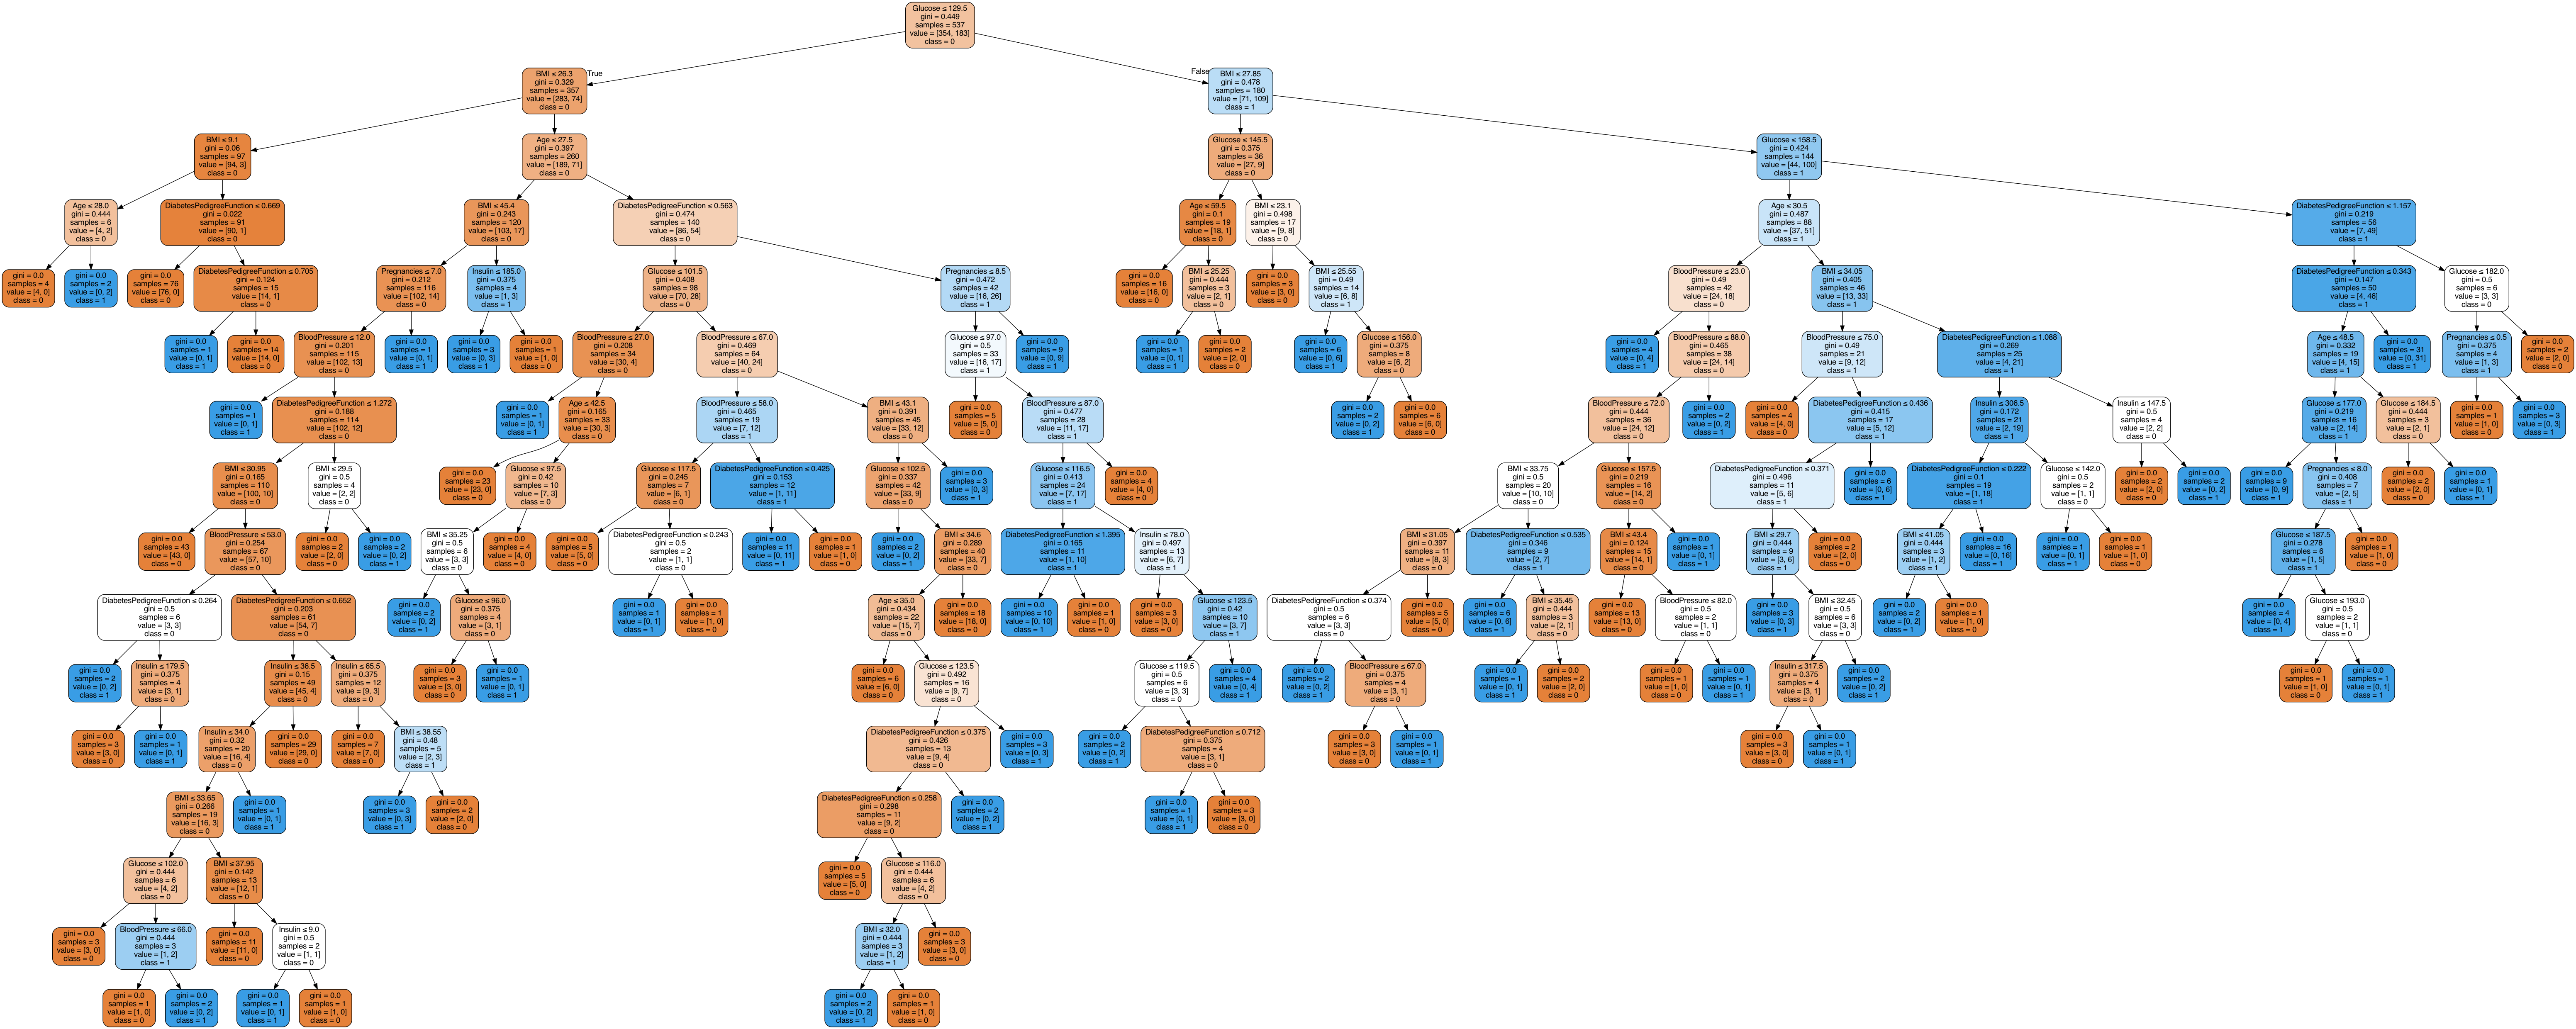

In [81]:
import sklearn.tree as tree
import pydotplus
from io import StringIO
from IPython.display import Image

feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']
dot_data = StringIO()
tree.export_graphviz(clf,
    out_file=dot_data,
    class_names=['0','1'], # the target names.
    feature_names=feature_cols, # the feature names.
    filled=True, # Whether to fill in the boxes with colours.
    rounded=True, # Whether to round the corners of the boxes.
    special_characters=True
)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [87]:
clf = DT(criterion='entropy', max_depth=3)

clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

0.7705627705627706


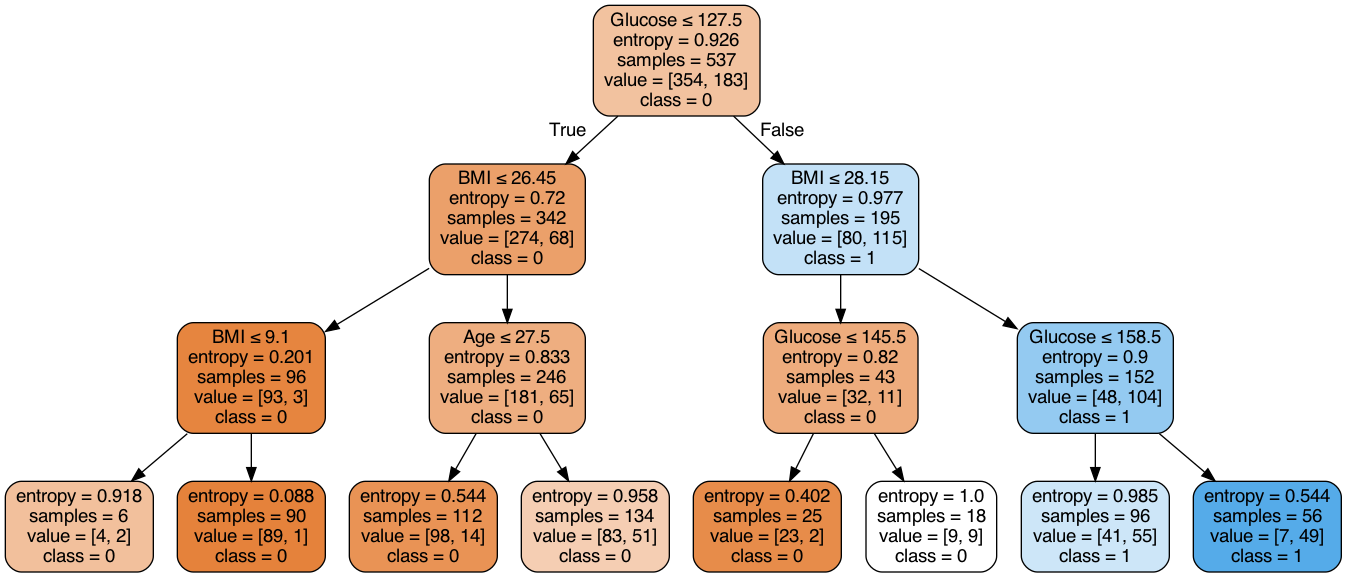

In [88]:
import sklearn.tree as tree
import pydotplus
from io import StringIO
from IPython.display import Image

feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']
dot_data = StringIO()
tree.export_graphviz(clf,
    out_file=dot_data,
    class_names=['0','1'], # the target names.
    feature_names=feature_cols, # the feature names.
    filled=True, # Whether to fill in the boxes with colours.
    rounded=True, # Whether to round the corners of the boxes.
    special_characters=True
)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### Random Forest
![Flow](https://s3.amazonaws.com/thinkific/file_uploads/236035/images/f9c/f26/f9c/1604472082656.jpg)

In [46]:
from sklearn import datasets
iris = datasets.load_iris()

In [61]:
print(iris.target_names)
print(iris.feature_names)
print(iris.data[0:5])
print(iris.target)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [53]:
import pandas as pd
# Dictionary key value pair
# List [] (Array)
data = pd.DataFrame({
    'sepal length': iris.data[:,0],
    'sepal width': iris.data[:, 1],
    'petal length': iris.data[:, 2],
    'petal width': iris.data[:, 3],
    'species': iris.target,
})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [54]:
from sklearn.model_selection import train_test_split

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]
y=data['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)



In [59]:
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn import metrics

clf = RF(n_estimators=100)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy', metrics.accuracy_score(y_test, y_pred))

Accucary 0.9777777777777777


In [60]:
clf.predict([[3, 5, 4, 2]])

array([2])

In [67]:
#Create a Gaussian Classifier
# clf=RF(n_estimators=100) #Train the model using the training sets
clf = RF(bootstrap=True, class_weight=None, criterion='gini', max_depth=None, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1, oob_score=False, random_state=None, verbose=0, warm_start=False)
# y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(n_jobs=1)

No handles with labels found to put in legend.


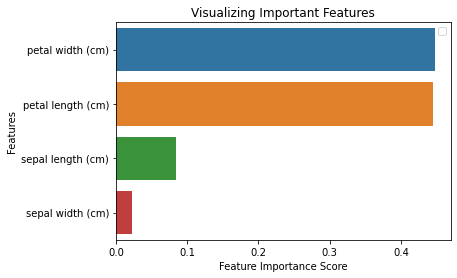

In [71]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_, index=iris.feature_names).sort_values(ascending=False)

feature_imp

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [73]:
from sklearn.model_selection import train_test_split

X=data[['petal length', 'petal width', 'sepal length']]
y=data['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=5)

clf = RF(n_estimators=100)

clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)

from sklearn import metrics

print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9523809523809523


# SVM Support Vector Machines
![SVM](https://s3.amazonaws.com/thinkific/file_uploads/236035/images/eac/162/c7f/1604472140243.jpg)
![SVM Non Linear](https://s3.amazonaws.com/thinkific/file_uploads/236035/images/5b5/c65/bab/1604472138041.jpg)

In [90]:
from sklearn import datasets

cancer = datasets.load_breast_cancer()



In [92]:
print(cancer.feature_names)
print(cancer.target_names)
cancer.data.shape

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


(569, 30)

In [94]:
print(cancer.target[0])

0


In [96]:
from sklearn.model_selection import train_test_split
# Import SVM
from sklearn.svm import SVC
from sklearn import metrics

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state=109)

# Generating Model
clf = SVC(kernel='linear')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)




Acc: 0.9649122807017544
Prec: 0.9811320754716981
Recall: 0.9629629629629629


In [99]:
print('Acc:', metrics.accuracy_score(y_test, y_pred))

print('Prec:', metrics.precision_score(y_test, y_pred))

print('Recall:',metrics.recall_score(y_test, y_pred))

help(metrics.recall_score)

Acc: 0.9649122807017544
Prec: 0.9811320754716981
Recall: 0.9629629629629629
Help on function recall_score in module sklearn.metrics._classification:

recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')
    Compute the recall
    
    The recall is the ratio ``tp / (tp + fn)`` where ``tp`` is the number of
    true positives and ``fn`` the number of false negatives. The recall is
    intuitively the ability of the classifier to find all the positive samples.
    
    The best value is 1 and the worst value is 0.
    
    Read more in the :ref:`User Guide <precision_recall_f_measure_metrics>`.
    
    Parameters
    ----------
    y_true : 1d array-like, or label indicator array / sparse matrix
        Ground truth (correct) target values.
    
    y_pred : 1d array-like, or label indicator array / sparse matrix
        Estimated targets as returned by a classifier.
    
    labels : list, optional
        The set of labe

In [100]:
pd.DataFrame(y_pred, columns=['predictions']).to_csv('cancer_pred.csv')